In [189]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.fftpack import ifft, fft, fftshift, fftfreq
from scipy.constants import pi, c

In [190]:
data = loadmat("/media/andrew/Big Boy/SAR_TEST_DATA/Backhoe_CP/2D_Challenge_Problem/2D_K_Space_Data/backhoe_el000_az350to100.mat")

In [191]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'VV', 'HH', 'HV', 'AZ', 'FGHz', 'EL', 'fn'])

In [192]:
vv_data = np.squeeze(data['VV'])
hh_data = np.squeeze(data['HH'])
hv_data = np.squeeze(data['HV'])
az_data = np.squeeze(data['AZ'])
el_data = np.squeeze(data['EL'])
freqs   = np.squeeze(data['FGHz'])

In [193]:
freq_step = freqs[1] - freqs[0]
time_step = 1e-9 / (2 * (freqs[1] - freqs[0]))
bandwidth = freq_step * freqs.shape[0] * 1e9
ranges = np.linspace(-0.5 * c * time_step, 0.5 * c * time_step, 4096)

In [220]:
num_freqs = 360
az_index = np.argwhere(az_data == 360)
filter_coef = np.hamming(num_freqs)

In [221]:
raw_signals = [vv_data, hh_data, hv_data]
filtered_signals = [np.squeeze(signal[0:num_freqs, az_index]) * filter_coef for signal in raw_signals]
norm_factor = np.min([np.max(np.abs(signal)) for signal in filtered_signals])
range_profiles = [fftshift(ifft(signal, 4096)) for signal in filtered_signals]
range_profiles_normed = [20 * np.log10(np.abs(range_profile) / norm_factor) for range_profile in range_profiles]

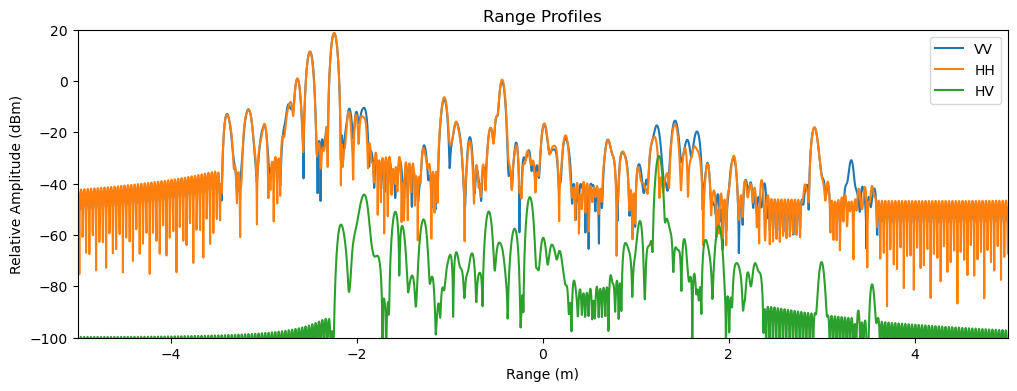

In [222]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot(ranges, range_profiles_normed[0], label='VV')
axs.plot(ranges, range_profiles_normed[1], label='HH')
axs.plot(ranges, range_profiles_normed[2], label='HV')
axs.set_xlim(-5, 5)
axs.set_ylim(-100, 20)
plt.title('Range Profiles')
plt.xlabel('Range (m)')
plt.ylabel('Relative Amplitude (dBm)')
plt.legend()
plt.show()